In [49]:
#Se importan las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime

In [50]:
#Se lee el archivo de datos metereológicos.
df0 = pd.read_excel('meteo-vid-2018.xlsx')

In [51]:
df0.dtypes

Date                datetime64[ns]
Time                        object
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                 float64
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)              float64
H. suelo 60                float64
Result2_Avg                float64
T. suelo 60 cm             float64
Result4_Avg         

In [52]:
df0.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,2018-01-06,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,2018-01-06,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,2018-01-06,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,2018-01-06,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,2018-01-06,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [53]:
#Se crea un nuevo DataFrame
df1=pd.DataFrame([])

In [54]:
#Se agregan las columnas que interesan.
df1["Mes"] = df0["Date"].dt.month
df1["Día"] = df0["Date"].dt.day
df1["VelViento"] = df0["WS_ms_S_WVT"]
df1["Temp"] = df0["AirTC_Avg"]
df1["RH"] = df0["RH"]
df1["RS"] = df0["Rs_net_Avg"]

In [55]:
df1.head()

,Mes,Día,VelViento,Temp,RH,RS
0,1,6,2.33,27.75,20.61,36.01
1,1,6,3.12,26.57,25.25,22.34
2,1,6,2.54,25.01,26.45,1.40
3,1,6,2.01,23.65,29.22,-3.15
4,1,6,2.14,22.84,31.08,-2.84


In [56]:
#Se obtienen los datos deseados mediante el comando gropby, además de hacer columnas de latitud, longitud y elevación.
df1["TMáx"] = df1.groupby(["Mes"])["Temp"].transform("max")
df1["TMín"] = df1.groupby(["Mes"])["Temp"].transform("min")
df1["TProm"] = df1.groupby(["Mes"])["Temp"].transform("mean")

df1["RHMáx"] = df1.groupby(["Mes"])["RH"].transform("max")
df1["RHMín"] = df1.groupby(["Mes"])["RH"].transform("min")
df1["RHProm"] = df1.groupby(["Mes"])["RH"].transform("mean")

df1["Vel"] = df1.groupby(["Mes"])["VelViento"].transform("mean")
df1["Rs"] = df1.groupby(["Mes"])["RS"].transform("mean")

In [57]:
#Se checa el contenido.
df1.head()

,Mes,Día,VelViento,Temp,RH,RS,TMáx,TMín,TProm,RHMáx,RHMín,RHProm,Vel,Rs
0,1,6,2.33,27.75,20.61,36.01,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695
1,1,6,3.12,26.57,25.25,22.34,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695
2,1,6,2.54,25.01,26.45,1.40,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695
3,1,6,2.01,23.65,29.22,-3.15,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695
4,1,6,2.14,22.84,31.08,-2.84,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695


In [58]:
#Se crea un DataFrame únicamente con los datos que interesan.
df2 = pd.DataFrame([])
df2["Mes"] = df1["Mes"]
df2["TMáx"] = df1["TMáx"]
df2["TMín"] = df1["TMín"]
df2["TProm"] = df1["TProm"]
df2["RHMáx"] = df1["RHMáx"]
df2["RHMín"] = df1["RHMín"]
df2["RHProm"] = df1["RHProm"]
df2["Vel"] = df1["Vel"]
df2["RS"] = df1["Rs"]


In [59]:
#Se deshacen los duplicados y se agrega la latitud, longitud y elevación.
df2 = df2.drop_duplicates()
df2.index = np.arange(0,len(df2))
Lat=[]
Long=[]
Elev=[]
for i in range (0,len(df2)):
    a = 28.918611
    b = -111.310639
    c = 101
    Lat.append(a)
    Long.append(b)
    Elev.append(c)
df2["Latitud"] = Lat
df2["Longitud"] = Long
df2["Elevación"] = Elev

In [60]:
#Se checa su contenido.
df2

,Mes,TMáx,TMín,TProm,RHMáx,RHMín,RHProm,Vel,RS,Latitud,Longitud,Elevación
0,1,33.35,0.54,16.963975,91.60,5.98,38.471432,1.943827,111.861695,28.918611,-111.310639,101
1,2,31.47,0.07,17.230275,99.53,6.76,48.168006,1.964189,126.347812,28.918611,-111.310639,101
2,3,35.22,3.06,19.282359,89.73,6.76,36.968353,1.926196,170.105269,28.918611,-111.310639,101
3,4,36.30,5.43,21.880618,93.40,5.23,40.785667,2.101812,213.415993,28.918611,-111.310639,101
4,5,38.18,7.13,23.650034,94.60,8.19,44.233468,2.113918,237.177688,28.918611,-111.310639,101
5,6,41.47,13.12,28.416187,98.37,5.34,50.810507,2.154986,224.636062,28.918611,-111.310639,101
6,7,44.94,18.71,31.065726,97.00,13.10,57.639805,2.022204,200.421983,28.918611,-111.310639,101
7,8,40.24,22.71,30.120894,98.60,30.16,68.868454,1.910853,189.466922,28.918611,-111.310639,101
8,9,41.39,19.43,29.661271,98.03,21.32,66.619750,1.790326,183.133271,28.918611,-111.310639,101
9,10,35.82,10.23,23.254207,98.47,17.32,68.696082,1.664435,148.386203,28.918611,-111.310639,101


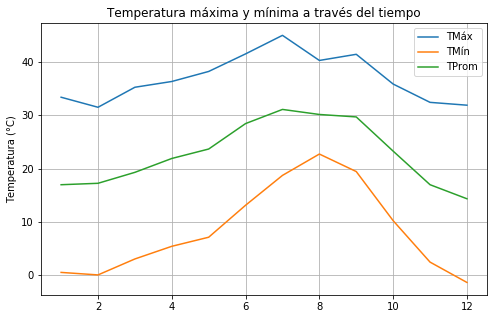

In [61]:
#Se grafica la evolución de la temperatura máxima y mínima.
plt.figure(1, figsize=(8, 5))

plt.plot(df2.Mes, df2.TMáx)
plt.plot(df2.Mes, df2.TMín)
plt.plot(df2.Mes, df2.TProm)
plt.title("Temperatura máxima y mínima a través del tiempo")
plt.ylabel("Temperatura (°C)")
plt.gca().legend(('TMáx','TMín', "TProm"))
plt.grid(True)
plt.savefig("EvolucionTemp", plt = 2000)
plt.show()

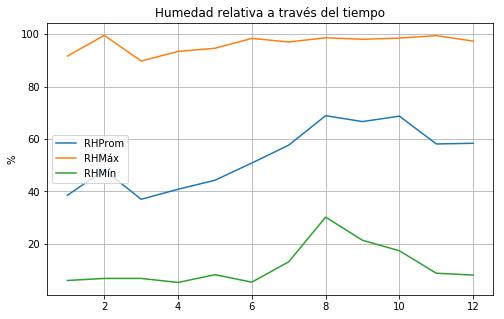

In [62]:
#Se grafica la evolución de la humedad relativa.
plt.figure(1, figsize=(8, 5))
           
plt.plot(df2.Mes, df2.RHProm)
plt.plot(df2.Mes, df2.RHMáx)
plt.plot(df2.Mes, df2.RHMín)
plt.title("Humedad relativa a través del tiempo")
plt.ylabel("%")
plt.gca().legend(('RHProm','RHMáx',"RHMín"))
plt.grid(True)
plt.savefig("EvolucionHR", plt = 2000)
plt.show()

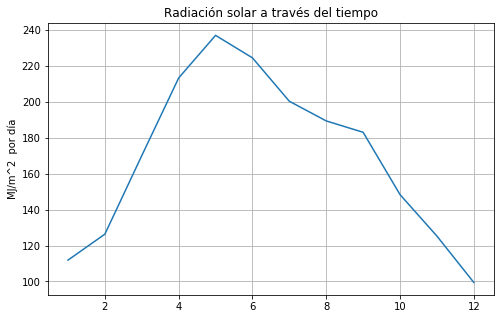

In [63]:
#Se grafica la evolución de la radiación solar.
plt.figure(1, figsize=(8, 5))

plt.plot(df2.Mes, df2.RS)

plt.title("Radiación solar a través del tiempo")
plt.ylabel("MJ/m^2  por día")
plt.grid(True)
plt.savefig("EvolucionRS", plt = 2000)
plt.show()

In [64]:
#Se consiguen los datos (ET0, etc) mediante las ecuaciones presentadas.
df3 = pd.DataFrame([])

jen=[]
val1=[]
val2=[]

for i in range (0,len(df1)):
    
    RS=df1.Rs[i]
    Prom = df1.TProm[i]
    lati=28.918611
    mn = df1.TMín[i]
    z = 101
    u = df1.VelViento[i]
    a = float(df0.albedo_Avg[i])
    RH = df1.RH[i]
    
    e= (0.0252*float(df0.AirTC_Avg[i]) + 0.078)*df1.Rs[i]
    jen.append(e)
    
    v= 0.0393 * RS * (Prom+9.5)**0.5 - 0.19 * RS**0.6 * ( (math.pi/180)*(lati) )**0.15 + 0.0061*(Prom+20)*(1.12*Prom-mn-2)**0.7
    val1.append(v)
    
    
    if i==0:
        j=df1.Día[0]
    elif df1.Día[i] != df1.Día[i-1]:
        j=j+1
    elif df1.Día[i] == df1.Día[i-1]:
        j=j
    
    
    d = 1+0.033*math.cos(2*j*math.pi/365)
    
    g = 0.409*math.sin(2*j*math.pi/365 - 1.39)
    
    w = math.acos(-math.tan(lati*math.pi/180) * math.tan(g) )
    

    Ra = (24*60/math.pi)*d*( w*math.sin(g)*math.sin(lati*math.pi/180) + math.cos(g)*math.cos(lati*math.pi/180)*math.sin(w))
    
    h = 0.051*(1-a)*RS*(Prom+9.5)**0.5 - 2.4*(RS/Ra)**2 + 0.048*(Prom+20)*(1- RH/100)*(0.5+0.536*u) + 0.00012*z
    
    val2.append(h)

df3["Mes"] = df1.Mes
df3["ET_J&H"] = jen
df3["ET_Valiantzas1"] = val1
df3["ET_Valiantzas4"] = val2

In [65]:
#Se checa su contenido.
df3.head()

,Mes,ET_J&H,ET_Valiantzas1,ET_Valiantzas4
0,1,86.950096,21.310199,31.362990
1,1,83.623777,21.310199,31.780606
2,1,79.226270,21.310199,31.328664
3,1,75.392546,21.310199,35.576110
4,1,73.109225,21.310199,35.315781


In [66]:
#Se obtienen los promedios y se deshacen los duplicados.
df3["ET_J&H"] = df3.groupby(["Mes"])["ET_J&H"].transform("mean")
df3["ET_Valiantzas1"] = df3.groupby(["Mes"])["ET_Valiantzas1"].transform("mean")
df3["ET_Valiantzas4"] = df3.groupby(["Mes"])["ET_Valiantzas4"].transform("mean")

df3=df3.drop_duplicates()
df3


,Mes,ET_J&H,ET_Valiantzas1,ET_Valiantzas4
0,1,56.545212,21.310199,43.165927
1214,2,64.715721,24.210628,50.449047
2558,3,95.924988,33.834978,67.057178
4046,4,134.322228,44.563196,86.068343
5486,5,159.853219,51.067272,96.785325
6974,6,178.380785,52.063887,99.099546
8414,7,172.534524,48.026437,78.859969
9902,8,158.592629,44.307655,84.900674
11390,9,151.169927,42.835503,87.684736
12830,10,98.529331,31.589043,70.496390


In [67]:
#Se procede a obtener la evotranspiración a traves del balance de energías.
#Se lee el archivo de datos de flujos.
df4 = pd.read_excel('flujos-vid-2018.xlsx')

In [68]:
#Se checa su contenido.
df4.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0.0,-9999.0,16.51,207.66,0.92767,1.00713,-1.0729,1
1,2018,7,1.0,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0.0,-9999.0,16.61,207.66,0.92767,1.01249,-0.9620,1
2,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0.0,-9999.0,16.07,207.66,0.92767,0.98371,-1.1643,1
3,2018,7,2.0,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0.0,-9999.0,16.06,207.66,0.92767,0.98318,-1.1648,1
4,2018,7,2.5,0.31,6.40,-0.55,-1.32,15.81,21.10,47.76,...,-9999,-9999,0.0,-9999.0,15.81,207.66,0.92767,0.96997,-1.4929,1


In [69]:
#Se crea y se llena un nuevo DataFrame con las variables deseadas.
df5=pd.DataFrame([])

df5["RnG"] = df4["Rg_f"]
df5["ET"] = df4["LE_f"]
df5["H"] = df4["H_f"]

df5["Día"] = df4["DoY"]
df5["Año"] = df4["Year"]
df5["Hora"] = df4["Hour"]

In [70]:
#Se checa su contenido.
df5.head()

,RnG,ET,H,Día,Año,Hora
0,-0.87,11.52,-20.04,7,2018,0.5
1,-0.97,15.11,-7.34,7,2018,1.0
2,-0.96,8.61,-9.76,7,2018,1.5
3,-2.06,1.93,-8.55,7,2018,2.0
4,-1.32,6.40,-0.55,7,2018,2.5


In [75]:
#Se recogen los datos de un mes típico (31 días).
df6 = pd.DataFrame([])

RNG = []
ET = []
H = []
Día = []
Año = []
Hora = []
for i in range (0,len(df5)):
    if df5.Día[i]<32:
        RNG.append(df5.RnG[i])
        ET.append(df5.ET[i])
        H.append(df5.H[i])
        Año.append(df5.Año[i])
        Hora.append(df5.Hora[i])
        Día.append(df5.Día[i])
        
df6["RnG"] = RNG
df6["ET"] = ET
df6["H"] = H
df6["Hora"] = Hora
    
    
    
    

    
    

In [76]:
#Se hace el promediaje.
df6["RnG"] = df5.groupby(["Hora"])["RnG"].transform("mean")
df6["ET"] = df5.groupby(["Hora"])["ET"].transform("mean")
df6["H"] = df5.groupby(["Hora"])["H"].transform("mean")

In [77]:
#Se deshacen los duplicados y se checa su contenido.
df6 = df6.drop_duplicates()
df6.head()

,RnG,ET,H,Hora
0,-1.676295,4.328268,-7.451123,0.5
1,-1.673203,3.148412,-6.646295,1.0
2,-1.621616,4.676462,-7.123287,1.5
3,-1.576880,4.483637,-7.540920,2.0
4,-1.571114,4.491677,-7.876099,2.5


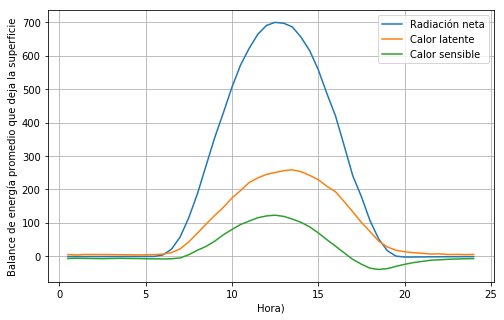

In [79]:
plt.figure(1, figsize=(8, 5))

plt.plot(df6.Hora, df6.RnG)
plt.plot(df6.Hora, df6.ET)
plt.plot(df6.Hora, df6.H)

plt.ylabel("Balance de energía promedio que deja la superficie")
plt.xlabel("Hora)")
plt.gca().legend(('Radiación neta','Calor latente',"Calor sensible"))
plt.grid(True)
plt.savefig("BalEne", plt = 2000)
plt.show()